In [1]:
#In this assignment students have to find the frequency of words in a webpage. 
#User can use urllib and BeautifulSoup to extract text from webpage. 
 
#Hint: 
#from bs4 import BeautifulSoup 
#import urllib.request 
#import nltk 
 
#response = urllib.request.urlopen('http://php.net/') 
#html = response.read() 
#soup = BeautifulSoup(html,"html5lib")

In [29]:
#Import Libraries
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from textblob import TextBlob ## Spell Check
from textblob import Word
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [30]:
#Load Data
response = urllib.request.urlopen('http://php.net/') 
html = response.read()

In [31]:
#Print the HTML data from Web Site
print('HTML ',html)

HTML  b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="

In [32]:
#use BeautifulSoup to clean the grabbed text data
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [33]:
#convert that text into tokens by splitting the text
tokens = [t for t in text.split()]

#Print the token
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [34]:
#Now calculate the frequency distribution of those tokens using Python NLTK
freq = nltk.FreqDist(tokens)

#Loop through and prent
for key,val in freq.items():
    print (str(key) + '=>' + str(val))

PHP:=>1
Hypertext=>1
PreprocessorDownloadsDocumentationGet=>1
InvolvedHelpGetting=>1
StartedIntroductionA=>1
simple=>1
tutorialLanguage=>1
ReferenceBasic=>1
syntaxTypesVariablesConstantsExpressionsOperatorsControl=>1
StructuresFunctionsClasses=>1
and=>80
ObjectsNamespacesErrorsExceptionsGeneratorsReferences=>1
ExplainedPredefined=>1
VariablesPredefined=>1
ExceptionsPredefined=>1
Interfaces=>1
ClassesContext=>1
options=>1
parametersSupported=>1
Protocols=>1
WrappersSecurityIntroductionGeneral=>1
considerationsInstalled=>1
as=>2
CGI=>1
binaryInstalled=>1
an=>2
Apache=>1
moduleSession=>1
SecurityFilesystem=>1
SecurityDatabase=>1
SecurityError=>1
ReportingUsing=>1
Register=>1
GlobalsUser=>1
Submitted=>1
DataMagic=>1
QuotesHiding=>1
PHPKeeping=>1
CurrentFeaturesHTTP=>1
authentication=>1
with=>4
PHPCookiesSessionsDealing=>1
XFormsHandling=>1
file=>1
uploadsUsing=>1
remote=>1
filesConnection=>1
handlingPersistent=>1
Database=>1
ConnectionsSafe=>1
ModeCommand=>1
line=>1
usageGarbage=>1
Collect

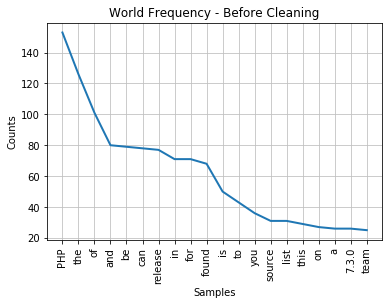

Above Graph shows all the worlds including article, Grammer etc. So We can clean and Display Valid Frequncy of World Distributions


In [35]:
#plot a graph for those tokens using plot function 
freq.plot(20, cumulative=False,title='World Frequency - Before Cleaning')

print('Above Graph shows all the worlds including article, Grammer etc. So We can clean and Display Valid Frequncy of World Distributions')

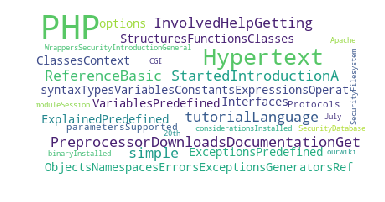

In [36]:
# display world count
df_world=pd.DataFrame()
df_world['World']=freq.keys()
df_world['Count']=freq.values()

#Display Top Frequency Worlds
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30,max_font_size=40,random_state=42).generate(str(df_world['World']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word.png", dpi=900)

In [37]:
#Analyse the data
# Store the data in in Data Frame
df_world=pd.DataFrame()
df_world['World']=freq.keys()
df_world['Count']=freq.values()

In [43]:
#Display 10 World count
df_world.head(10)

,World,Count,char_count,SpeicalChar,Numerics
0,PHP:,1,4,1,0
1,Hypertext,1,9,0,0
2,PreprocessorDownloadsDocumentationGet,1,37,0,0
3,InvolvedHelpGetting,1,19,0,0
4,StartedIntroductionA,1,20,0,0
5,simple,1,6,0,0
6,tutorialLanguage,1,16,0,0
7,ReferenceBasic,1,14,0,0
8,syntaxTypesVariablesConstantsExpressionsOperat...,1,56,0,0
9,StructuresFunctionsClasses,1,26,0,0


In [44]:
#Display Number of Charcter
df_world['char_count'] = df_world['World'].str.len() ## this also includes spaces
df_world.head(10)

,World,Count,char_count,SpeicalChar,Numerics
0,PHP:,1,4,1,0
1,Hypertext,1,9,0,0
2,PreprocessorDownloadsDocumentationGet,1,37,0,0
3,InvolvedHelpGetting,1,19,0,0
4,StartedIntroductionA,1,20,0,0
5,simple,1,6,0,0
6,tutorialLanguage,1,16,0,0
7,ReferenceBasic,1,14,0,0
8,syntaxTypesVariablesConstantsExpressionsOperat...,1,56,0,0
9,StructuresFunctionsClasses,1,26,0,0


In [45]:
#Number of special characters
df_world['SpeicalChar'] = df_world['World'].apply(lambda x: len([x for x in x.split() if x.endswith(':')]))
df_world.loc[(df_world.SpeicalChar.values!=0)].head()

,World,Count,char_count,SpeicalChar,Numerics
0,PHP:,1,4,1,0


In [46]:
#Number of numerics
df_world['Numerics'] = df_world['World'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_world.loc[(df_world.Numerics.values!=0)].head()

,World,Count,char_count,SpeicalChar,Numerics
256,7,1,1,0,1
434,3,8,1,0,1
441,2,2,1,0,1
446,1,4,1,0,1
472,4,2,1,0,1


In [47]:
#pre-process data
# Make all Lower Cases
df_world['World'] = df_world['World'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_world.head()

,World,Count,char_count,SpeicalChar,Numerics
0,php:,1,4,1,0
1,hypertext,1,9,0,0
2,preprocessordownloadsdocumentationget,1,37,0,0
3,involvedhelpgetting,1,19,0,0
4,startedintroductiona,1,20,0,0


In [48]:
#Removing All Punctuation
df_world['World'] = df_world['World'].str.replace('[^\w\s]','')
df_world.head()

,World,Count,char_count,SpeicalChar,Numerics
0,php,1,4,1,0
1,hypertext,1,9,0,0
2,preprocessordownloadsdocumentationget,1,37,0,0
3,involvedhelpgetting,1,19,0,0
4,startedintroductiona,1,20,0,0


In [49]:
#Streaming
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library
st = PorterStemmer()
df_world['World'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_world.head()

,World,Count,char_count,SpeicalChar,Numerics
0,php,1,4,1,0
1,hypertext,1,9,0,0
2,preprocessordownloadsdocumentationget,1,37,0,0
3,involvedhelpgetting,1,19,0,0
4,startedintroductiona,1,20,0,0


In [50]:
#Lemmatization
#Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
#It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

df_world['World'] = df_world['World'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_world.head()

,World,Count,char_count,SpeicalChar,Numerics
0,php,1,4,1,0
1,hypertext,1,9,0,0
2,preprocessordownloadsdocumentationget,1,37,0,0
3,involvedhelpgetting,1,19,0,0
4,startedintroductiona,1,20,0,0


In [51]:
#Filter and Store top 20 world
df_world_final=(df_world.loc[(df_world.World.values!='')].sort_values(by=['Count'],ascending=False)).head(8)
df_world_final

,World,Count,char_count,SpeicalChar,Numerics
136,php,153,3,0,0
142,the,126,3,0,0
161,of,101,2,0,0
10,and,80,3,0,0
186,be,79,2,0,0
185,can,78,3,0,0
202,release,77,7,0,0
229,for,71,3,0,0


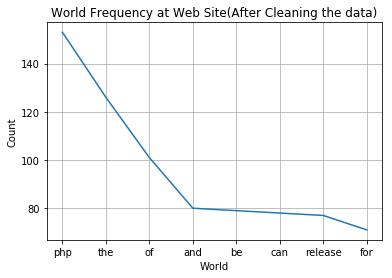

In [52]:
#plot a graph for cleaned data
#df_world.plot.scatter(df_world.World, df_world.Count)
plt.plot(df_world_final.World.values, df_world_final.Count.values)
plt.xlabel('World')
plt.ylabel('Count')

plt.title('World Frequency at Web Site(After Cleaning the data)')
plt.grid()
plt.show()

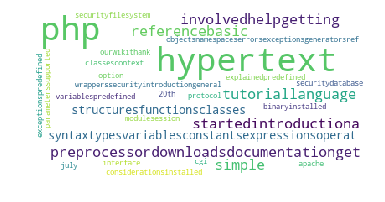

In [53]:
#Display Top Frequency Worlds in World Cloud
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30,max_font_size=40,random_state=42).generate(str(df_world['World']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [54]:
#Store the image in current directory
fig.savefig("word-img.png", dpi=900)